### Simple Linear Regression

In [1]:
import numpy as np
import pandas as pd
import scipy
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
sns.set()

In [2]:
    data = pd.read_csv('E:/TUSHAR ANNAM/Machine_Learning/using_Statsmodels/1.01. Simple linear regression.csv')

In [3]:
data

,SAT,GPA
0,1714,2.40
1,1664,2.52
2,1760,2.54
3,1685,2.74
4,1693,2.83
...,...,...
79,1936,3.71
80,1810,3.71
81,1987,3.73
82,1962,3.76


### SAT = Critical Reading + Mathematics + Writing
### GPA = Grade Point Average(at graduation from university)
### We will create a linear regression which predicts GPA based on the SAT score obtained.

In [4]:
data.describe()

,SAT,GPA
count,84.000000,84.000000
mean,1845.273810,3.330238
std,104.530661,0.271617
min,1634.000000,2.400000
25%,1772.000000,3.190000
50%,1846.000000,3.380000
75%,1934.000000,3.502500
max,2050.000000,3.810000


## Creating First Regression
### Simple Linear Regression Equation : y = b0 + b1*x1
### Define the dependent and independent variable

In [5]:
y = data['GPA']
x1 = data['SAT']

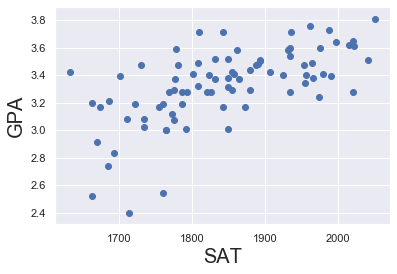

In [6]:
#plot a scatter plot
plt.scatter(x1,y)
#Naming the axes
plt.xlabel('SAT',fontsize = 20)
plt.ylabel('GPA',fontsize = 20)
#show the plot
plt.show()

In [7]:
# Add a constant. Essentially, we are adding a new column (equal in lenght to x), which consists only of 1s
x = sm.add_constant(x1)
# Fit the model, according to the OLS (ordinary least squares) method with a dependent variable y and an idependent x
results = sm.OLS(y,x).fit()
# Print a nice summary of the regression. That's one of the strong points of statsmodels -> the summaries
results.summary()

C:\Users\DELL\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    GPA   R-squared:                       0.406
Model:                            OLS   Adj. R-squared:                  0.399
Method:                 Least Squares   F-statistic:                     56.05
Date:                Tue, 19 May 2020   Prob (F-statistic):           7.20e-11
Time:                        23:51:41   Log-Likelihood:                 12.672
No. Observations:                  84   AIC:                            -21.34
Df Residuals:                      82   BIC:                            -16.48
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2750      0.409      0.673      0.503      -0.538       1.088
SAT            0.0017      0.000      7.487      0.000       0.001       0.002
==============================================================================
Omnibus:                       12.839   Durbin-Watson:                   0.950
Prob(Omnibus):                  0.002   Jarque-Bera (JB):               16.155
Skew:                          -0.722   Prob(JB):                     0.000310
Kurtosis:                       4.590   Cond. No.                     3.29e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.29e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

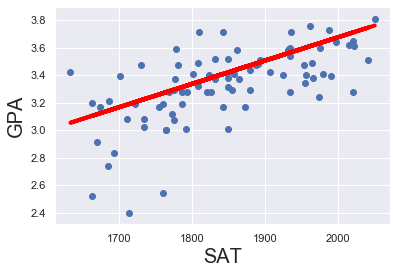

In [8]:
# Create a scatter plot
plt.scatter(x1,y)
# Define the regression equation, so we can plot it later
#yhat = b1*x1 + b0
yhat = 0.0017*x1 + 0.275
# Plot the regression line against the independent variable (SAT)
fig = plt.plot(x1,yhat, lw=4, c='red', label ='regression line')
# where, lw = line width, c = color
# Label the axes
plt.xlabel('SAT', fontsize = 20)
plt.ylabel('GPA', fontsize = 20)
plt.show()

### Multiple Linear Regression and Adjusted R-squared

In [9]:
data1 = pd.read_csv('E:/TUSHAR ANNAM/Machine_Learning/using_Statsmodels/1.02. Multiple linear regression.csv')

In [10]:
data1

,SAT,GPA,"Rand 1,2,3"
0,1714,2.40,1
1,1664,2.52,3
2,1760,2.54,3
3,1685,2.74,3
4,1693,2.83,2
...,...,...,...
79,1936,3.71,3
80,1810,3.71,1
81,1987,3.73,3
82,1962,3.76,1


In [11]:
data1.describe()

,SAT,GPA,"Rand 1,2,3"
count,84.000000,84.000000,84.000000
mean,1845.273810,3.330238,2.059524
std,104.530661,0.271617,0.855192
min,1634.000000,2.400000,1.000000
25%,1772.000000,3.190000,1.000000
50%,1846.000000,3.380000,2.000000
75%,1934.000000,3.502500,3.000000
max,2050.000000,3.810000,3.000000


### Creating multiple regression

In [12]:
y = data1['GPA']
x1 = data1[['SAT','Rand 1,2,3']]

In [13]:
x = sm.add_constant(x1)
results = sm.OLS(y,x).fit()

In [14]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    GPA   R-squared:                       0.407
Model:                            OLS   Adj. R-squared:                  0.392
Method:                 Least Squares   F-statistic:                     27.76
Date:                Tue, 19 May 2020   Prob (F-statistic):           6.58e-10
Time:                        23:51:42   Log-Likelihood:                 12.720
No. Observations:                  84   AIC:                            -19.44
Df Residuals:                      81   BIC:                            -12.15
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2960      0.417      0.710      0.480      -0.533       1.125
SAT            0.0017      0.000      7.432      0.000       0.001       0.002
Rand 1,2,3    -0.0083      0.027     -0.304      0.762      -0.062       0.046
==============================================================================
Omnibus:                       12.992   Durbin-Watson:                   0.948
Prob(Omnibus):                  0.002   Jarque-Bera (JB):               16.364
Skew:                          -0.731   Prob(JB):                     0.000280
Kurtosis:                       4.594   Cond. No.                     3.33e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.33e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### Dealing with Categorical Data - Dummy Variables

In [15]:
raw_data = pd.read_csv('E:/TUSHAR ANNAM/Machine_Learning/using_Statsmodels/1.03. Dummies.csv')

In [16]:
 raw_data

,SAT,GPA,Attendance
0,1714,2.40,No
1,1664,2.52,No
2,1760,2.54,No
3,1685,2.74,No
4,1693,2.83,No
...,...,...,...
79,1936,3.71,Yes
80,1810,3.71,Yes
81,1987,3.73,No
82,1962,3.76,Yes


In [17]:
raw_data.describe()

,SAT,GPA
count,84.000000,84.000000
mean,1845.273810,3.330238
std,104.530661,0.271617
min,1634.000000,2.400000
25%,1772.000000,3.190000
50%,1846.000000,3.380000
75%,1934.000000,3.502500
max,2050.000000,3.810000


#### Converting or maping Categorical data into Numerical data with dummy variable 1.e, Yes to 1 and No to 0 by using map() function.

In [18]:
data = raw_data.copy()

In [19]:
data['Attendance'] = data['Attendance'].map({'Yes': 1, 'No': 0})

In [20]:
data

,SAT,GPA,Attendance
0,1714,2.40,0
1,1664,2.52,0
2,1760,2.54,0
3,1685,2.74,0
4,1693,2.83,0
...,...,...,...
79,1936,3.71,1
80,1810,3.71,1
81,1987,3.73,0
82,1962,3.76,1


In [21]:
data.describe()

,SAT,GPA,Attendance
count,84.000000,84.000000,84.000000
mean,1845.273810,3.330238,0.464286
std,104.530661,0.271617,0.501718
min,1634.000000,2.400000,0.000000
25%,1772.000000,3.190000,0.000000
50%,1846.000000,3.380000,0.000000
75%,1934.000000,3.502500,1.000000
max,2050.000000,3.810000,1.000000


#### We have to find no. of students who have more than 75% of attendence from above 0 and 1 data of attendence
#### So, the mean of attendence showing 46% of students have above 75% attendence.

In [22]:
y = data['GPA']
x1 = data[['SAT','Attendance']]

In [23]:
x = sm.add_constant(x1)
results = sm.OLS(y,x).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    GPA   R-squared:                       0.565
Model:                            OLS   Adj. R-squared:                  0.555
Method:                 Least Squares   F-statistic:                     52.70
Date:                Tue, 19 May 2020   Prob (F-statistic):           2.19e-15
Time:                        23:51:44   Log-Likelihood:                 25.798
No. Observations:                  84   AIC:                            -45.60
Df Residuals:                      81   BIC:                            -38.30
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.6439      0.358      1.797      0.076      -0.069       1.357
SAT            0.0014      0.000      7.141      0.000       0.001       0.002
Attendance     0.2226      0.041      5.451      0.000       0.141       0.304
==============================================================================
Omnibus:                       19.560   Durbin-Watson:                   1.009
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               27.189
Skew:                          -1.028   Prob(JB):                     1.25e-06
Kurtosis:                       4.881   Cond. No.                     3.35e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.35e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

#### Now, Equation for student attended then GPA = 0.6439 + 0.0014 * SAT + 0.2226 * Attendence ; where, Attendence = 1
#### Equation for student not attended then GPA = 0.6439 + 0.0014 * SAT + 0.2226 * Attendence ; where, Attendence = 0.

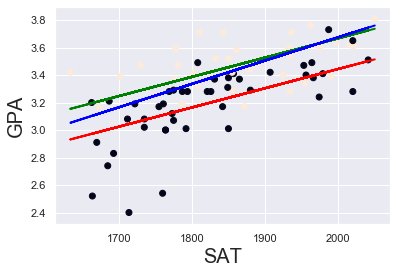

In [24]:
plt.scatter(data['SAT'], data['GPA'], c = data['Attendance'])
yhat_no = 0.6439 + 0.0014*data['SAT']
yhat_yes = 0.8665 + 0.0014*data['SAT'] ###adding attendance value with constant
yhat = 0.0017*data['SAT'] + 0.275
fig = plt.plot(data['SAT'], yhat_no, lw = 2, c='red', label = 'regression line1')
fig = plt.plot(data['SAT'], yhat_yes, lw = 2, c='green', label = 'regression line2')
fig = plt.plot(data['SAT'], yhat, lw = 2, c = 'blue', label = 'regression line')
plt.xlabel('SAT', fontsize = 20)
plt.ylabel('GPA', fontsize = 20)
plt.show()

### How to make predictions based on the regressions we create

In [25]:
# Let's see what's inside the independent variable. 
# The first column comes from the 'add_constant' method. It's only 1s, told ya! 
x

,const,SAT,Attendance
0,1.0,1714,0
1,1.0,1664,0
2,1.0,1760,0
3,1.0,1685,0
4,1.0,1693,0
...,...,...,...
79,1.0,1936,1
80,1.0,1810,1
81,1.0,1987,0
82,1.0,1962,1


In [26]:
# Create a new data frame, identical in organization to X.
# The constant is always 1, while each of the lines corresponds to an observation (student)
new_data = pd.DataFrame({'const': 1,'SAT': [1700, 1670], 'Attendance': [0, 1]})
# By default, when you create a df (not load, but create), the columns are sorted alphabetically
# So if we don't reorder them, they would be 'Attendance', 'const', 'SAT'
# If you feed them in the wrong order, you will get wrong results!
new_data = new_data[['const','SAT','Attendance']]
new_data

,const,SAT,Attendance
0,1,1700,0
1,1,1670,1


In [27]:
# I am renaming the indices for the purposes of this example.
# That's by not really a good practice => I won't overwrite the variable.
# If I want to use NumPy, sklearn, etc. methods on a df with renamed indices, they will simply be lost
# and returned to 0,1,2,3, etc.
new_data.rename(index={0: 'Bob',1:'Alice'})

,const,SAT,Attendance
Bob,1,1700,0
Alice,1,1670,1


In [28]:
# Use the predict method on the regression with the new data as a single argument
predictions = results.predict(new_data)
# The result
predictions

0    3.023513
1    3.204163
dtype: float64

In [29]:
# If we want we can create a data frame, including everything
predictionsdf = pd.DataFrame({'Predictions':predictions})
# Join the two data frames
joined = new_data.join(predictionsdf)
# Rename the indices as before (not a good practice in general) 
joined.rename(index={0: 'Bob',1:'Alice'})

,const,SAT,Attendance,Predictions
Bob,1,1700,0,3.023513
Alice,1,1670,1,3.204163


# --------------------------------------------------------------------------------------------------------------

# Simple linear regression using Sklearn

In [30]:
# For these lessons we will need NumPy, pandas, matplotlib and seaborn
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

# and of course the actual regression (machine learning) module
from sklearn.linear_model import LinearRegression

In [31]:
# We start by loading the data
data = pd.read_csv('E:/TUSHAR ANNAM/Machine_Learning/sklearn/1.01. Simple linear regression.csv')

# Let's explore the top 5 rows of the df
data.head()

,SAT,GPA
0,1714,2.40
1,1664,2.52
2,1760,2.54
3,1685,2.74
4,1693,2.83


In [32]:
# There is a single independent variable: 'SAT'
x = data['SAT']

# and a single depended variable: 'GPA'
y = data['GPA']

In [33]:
x.shape

(84,)

In [34]:
y.shape

(84,)

In [35]:
# In order to feed x to sklearn, it should be a 2D array (a matrix)
# Therefore, we must reshape it 
# Note that this will not be needed when we've got more than 1 feature (as the inputs will be a 2D array by default)

# x_matrix = x.values.reshape(84,1)
x = x.values.reshape(-1,1)

# Check the shape just in case
x.shape

(84, 1)

In [36]:
# We start by creating a linear regression object
reg = LinearRegression()

In [37]:
# The whole learning process boils down to fitting the regression
# Note that the first argument is the independent variable, while the second - the dependent (unlike with StatsModels)
reg.fit(x,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

#### From the above line of output the parameter "copy_X=True" says that it create copy of the input before fitting them as it is a safety net against normalization and transformaton.
#### "fit_intercept=True" says that it considers constant to model as in statsmodel we have to use add_constant() function in sklearn it automatically takes constant without declaring them
#### "n_jobs=1" it denotes that no. CPU should be used is 1, we can increase the no. of CPU by any no. other than 1 if it's available.

## R-squared

In [38]:
reg.score(x,y)

0.40600391479679765

## Coefficient

In [39]:
reg.coef_

array([0.00165569])

## Intercept (Constant value as like of statsmodel)

In [40]:
reg.intercept_

0.2750402996602803

## Making prediction

In [41]:
reg.predict([[1740]])       #by icluding [[]] we made it 2D.

array([3.15593751])

In [42]:
new_data = pd.DataFrame(data = [2703,3398], columns=['SAT'])

In [43]:
new_data

,SAT
0,2703
1,3398


In [44]:
reg.predict(new_data)

array([4.7503651 , 5.90106829])

In [45]:
new_data['prediction'] = reg.predict(new_data)
new_data

,SAT,prediction
0,2703,4.750365
1,3398,5.901068


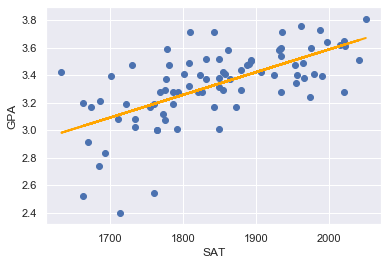

In [46]:
plt.scatter(x,y)
yhat = reg.coef_*x + reg.intercept_
fig = plt.plot(x,yhat, lw=2, c='orange', label='Regression line')
plt.xlabel('SAT')
plt.ylabel('GPA')
plt.show()

## Multiple Linear Regression and Adjusted R-squared

In [47]:
reg.score(x,y)

0.40600391479679765

In [58]:
#reg.score(x,y)

In [50]:
x.shape

(84, 1)

In [51]:
r2 = reg.score(x,y)
n = x.shape[0]
p = x.shape[1]

adjusted_r2 = 1-(1-r2)*(n-1)/(n-p-1)
adjusted_r2

0.3987600600991976

### Feature selection method is used to remove unneeded variable in model 
## Feature Selection

In [52]:
from sklearn.feature_selection import f_regression

In [53]:
f_regression(x,y)

(array([56.04804786]), array([7.19951844e-11]))

#### In the above output array the 1st array is of F-statistics and the 2nd array is of corr. p-values

In [54]:
pvalue = f_regression(x,y)[1]
pvalue

array([7.19951844e-11])

#### in the above value e-11 means *10 raiseto -11 OR /10 raiseto -11 

### Creating a summay table(statsmodel table)

In [55]:
reg_summary = pd.DataFrame(data = ['SAT'], columns=['Features'])
reg_summary

,Features
0,SAT


In [56]:
reg.coef_

array([0.00165569])

In [57]:
reg_summary['coefficients'] = reg.coef_
reg_summary['pvalues'] = pvalue
reg_summary

,Features,coefficients,pvalues
0,SAT,0.001656,7.199518e-11
